# Preamble

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pylab as plt

# Important Functions

In [42]:
def eval_2d_gauss(x,y,u_x,u_y,s_x,s_y):
    answ = 1.0/(2*np.pi*s_x*s_y)*np.exp(-0.5*(((x-u_x)/s_x)**2+((y-u_y)/s_y)**2))
    return answ

def gamma(x,p,u,s):
    #x[sample,x or y]
    #u[density num,x or y]
    #u[density num,x or y]
    gamma_var = np.zeros(x.shape,dtype=float)
    #gamma[sample,density]
    #p[density]
    
    for k in range(x.shape[0]):
        d0 = eval_2d_gauss(x[k,0],x[k,1],u[0,0],u[0,1],s[0,0],s[0,1])
        d1 = eval_2d_gauss(x[k,0],x[k,1],u[1,0],u[1,1],s[1,0],s[1,1])
        
        gamma_var[k,0] = (p[0]*d0)/(p[0]*d0 + p[1]*d1)
        gamma_var[k,1] = (p[1]*d1)/(p[0]*d0 + p[1]*d1)
        
    return gamma_var

def mean(x,gamma_var):
    N0 = np.sum(gamma_var[:,0])
    N1 = np.sum(gamma_var[:,1])
    
    u = np.zeros((2,2),dtype=float) #u[density num,x or y]
    p = np.zeros((2,),dtype=float) #p[density num]
    
    u[0,0] = (1.0/N0) * np.sum(gamma_var[:,0]*x[:,0])
    u[0,1] = (1.0/N0) * np.sum(gamma_var[:,0]*x[:,1])
    
    u[1,0] = (1.0/N1) * np.sum(gamma_var[:,1]*x[:,0])
    u[1,1] = (1.0/N1) * np.sum(gamma_var[:,1]*x[:,1])
    
    p[0] = N0/x.shape[0]
    p[1] = N1/x.shape[0]
   
    return u,p
    
def sigma(x,gamma_var,u):
    N0 = np.sum(gamma_var[:,0])
    N1 = np.sum(gamma_var[:,1])
        
    s = np.zeros((2,2),dtype=float) #s[density num,x or y]
    
    s[0,0] = np.sqrt((1.0/N0) * np.sum(gamma_var[:,0]*(x[:,0]-u[0,0])**2))
    s[0,1] = np.sqrt((1.0/N0) * np.sum(gamma_var[:,0]*(x[:,1]-u[0,1])**2))
    
    s[1,0] = np.sqrt((1.0/N1) * np.sum(gamma_var[:,1]*(x[:,0]-u[1,0])**2))
    s[1,1] = np.sqrt((1.0/N1) * np.sum(gamma_var[:,1]*(x[:,1]-u[1,1])**2))
    
    return s

# Generating Unlabelled Data

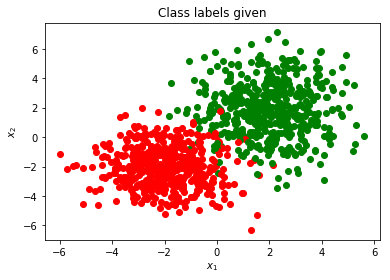

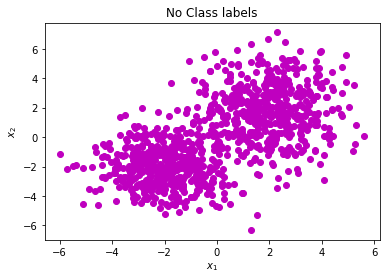

In [6]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
c = np.array(["r","g"])
# Mean of each cluster
means = np.array([[-2, 2], [-2, 2],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

x = X.T

# Plot the data

# GMM

 1. Initialize parameters π, u, Σ (k-means).
 2. E-step: Estimate responsibilities λ
 3. M-step: Re-estimate parameters π, u, Σ
 4. Check for convergence of parameters or log-likelihood (increase monotonically)
 5. Iterate from (2) until convergence

In [114]:
def gmm(x,p_i,u_i,s_i,itra):
    
    #initialize parameters
    
    p = np.copy(p_i)
    u = np.copy(u_i)
    s = np.copy(s_i)
    
    for k in range(itra):
        
        gamma_var = gamma(x,p,u,s) #E step
        
                
        u,p = mean(x,gamma_var)#M step
        s = sigma(x,gamma_var,u)
        
        #no convergence checking, simplistic toy example
        
        # plotting only
        if k%1 == 0:
            ax = plt.gca()
            circ1 = plt.Circle((u[0,0],u[0,1]),s[0,0],edgecolor='green',facecolor='white',fill=True,linewidth=3,zorder=1)
            circ2 = plt.Circle((u[1,0],u[1,1]),s[1,0],edgecolor='red',facecolor='white',fill=True,linewidth=3,zorder=2)
            ax.add_artist(circ1)
            ax.add_artist(circ2)
            for i in range(x.shape[0]):
                col = [[gamma_var[i,1],gamma_var[i,0],0]]
                ax.scatter(x[i,0],x[i,1],c=col,zorder=3,alpha=0.2)
                
            ax.set_xlabel("$x_1$")
            ax.set_ylabel("$x_2$")
            ax.set_title("Iteration : "+str(k))
            plt.show()


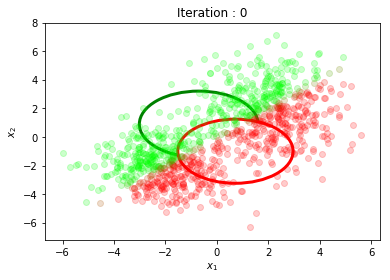

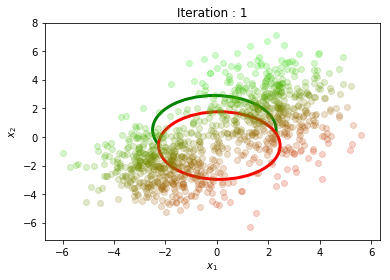

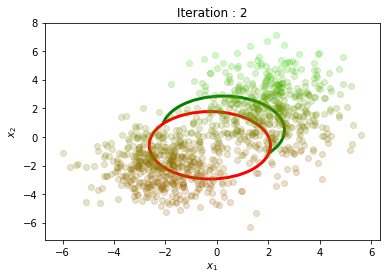

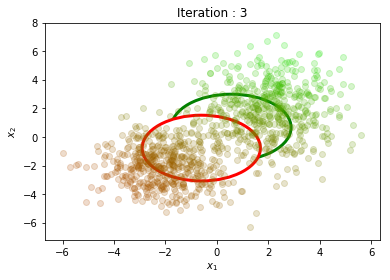

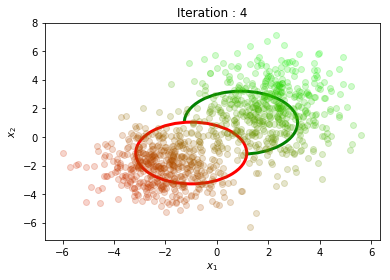

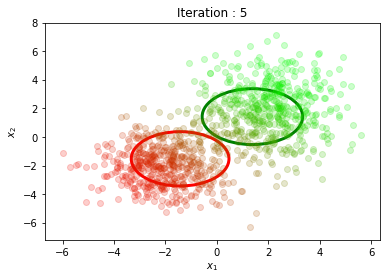

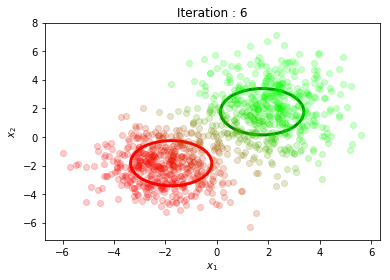

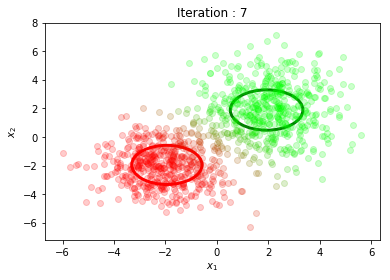

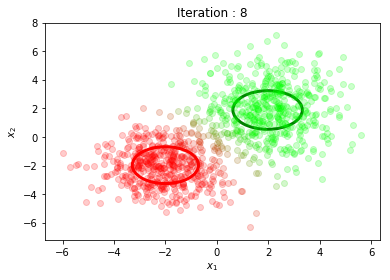

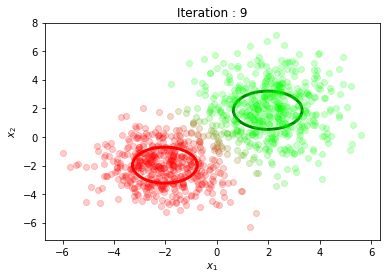

In [119]:
p_i = np.array([0.5,0.5])
u_i = np.array([[-4,4],[4,-4]])
s_i = np.array([[1,1],[1,1]])

#print(u_i)
#print(s_i)

#print(x.shape)

gmm(x,p_i,u_i,s_i,10)
